In [1]:
from transcription_pipeline.RateExtraction import FitAndAverage
import pandas as pd
import matplotlib as mpl
mpl.use('TkAgg')

In [2]:
dataset_folder = '/mnt/Data1/Nick/transcription_pipeline/'

# embryo_list = [
#     'test_data/NSPARC/2025-03-31/MCP-mSG_His-RFP_Var2(001)_embryo01',
#     'test_data/NSPARC/2025-03-31/MCP-mSG_His-RFP_Var2(001)_embryo02',
#     'test_data/NSPARC/2025-04-01/MCP-mSG_His-RFP_Var2(001)_embryo20',
#     'test_data/NSPARC/2025-04-01/MCP-mSG_His-RFP_Var2(001)_embryo38',
# ]

# embryo_list = [
#     'test_data/NSPARC/2025-04-14/MCP-mSG_His-RFP_Var2(001)_embryo28',
#     'test_data/NSPARC/2025-04-15/MCP-mSG_His-RFP_Var2(001)_embryo01',
# ]

# 23C embryos from 2025-04-22
embryo_list = [
    'test_data/NSPARC/2025-04-22/MCP-mSG_His-RFP_Var2(001)_embryo01_22.8C',
    'test_data/NSPARC/2025-04-22/MCP-mSG_His-RFP_Var2(001)_embryo02_23C',
]

test_dataset_name = dataset_folder + embryo_list[0]
print('Dataset Path: ' + test_dataset_name)

Dataset Path: /mnt/Data1/Nick/transcription_pipeline/test_data/NSPARC/2025-04-22/MCP-mSG_His-RFP_Var2(001)_embryo01_22.8C


In [3]:
# Specify here at what frame NC14 starts
nc14_start_frame = 0

# Any trace with frame number smaller than min_frames will be filtered out
min_frames = 40

# Number of bins you want to split the full embryo into
num_bins = 42

# Load in compiled dataframe
dataframe_path = test_dataset_name + '/compiled_dataframe.pkl'
compiled_dataframe = pd.read_pickle(dataframe_path)

In [ ]:
compiled_dataframe.head()

In [4]:
faadata = FitAndAverage(compiled_dataframe, nc14_start_frame, min_frames, num_bins, test_dataset_name)

Load previous particle trace fit checking results from "particle_fits_checked.pkl"


In [6]:
mpl.use('TkAgg')
faadata.check_particle_fits()

/mnt/Data1/Nick/transcription_pipeline/transcription_pipeline/RateExtraction.py:556: UserWarning: No particle has been left unchecked
  warn('No particle has been left unchecked')


In [ ]:
faadata.save_checked_particle_fits()

In [ ]:
# Load checked particle fits
fits_path = test_dataset_name + '/particle_fits_checked.pkl'
particle_fits_checked = pd.read_pickle(fits_path)

In [ ]:
particle_fits_checked.head()

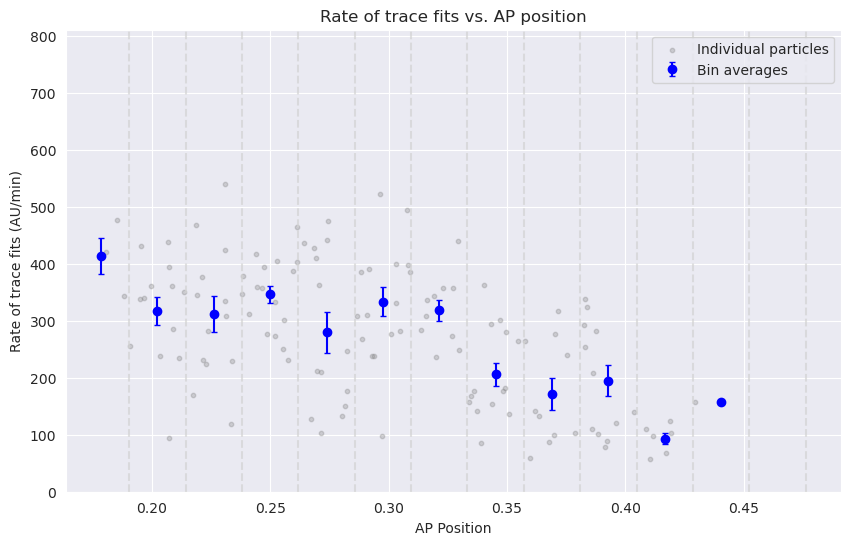

In [5]:
%matplotlib inline
ap_positions, mean_fit_rates, SE_fit_rates, bin_counts, bin_particles_rates = faadata.average_particle_fits();

In [ ]:
bin_particles_rates